<a href="https://colab.research.google.com/github/zangatec/TC5035_Equipo10/blob/main/Avance2_Equipo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 12.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import os
DIR = "/content/drive/MyDrive/datos/"
os.chdir(DIR)

In [7]:
import zipfile

def extract_and_merge_zip(zip_files, extract_path="/content/drive/MyDrive/datos/"):
    os.makedirs(extract_path, exist_ok=True)

    df_list = []

    for zip_file in zip_files:
        with zipfile.ZipFile(zip_file, 'r') as z:
            z.extractall(extract_path)
            for file in z.namelist():
                if file.endswith(".txt"):  # Asegura que solo lea archivos TXT
                    file_path = os.path.join(extract_path, file)
                    df = pd.read_csv(file_path, delimiter="|")  # Usa "|" como delimitador
                    df_list.append(df)

    merged_df = pd.concat(df_list, ignore_index=True)

    # Limpia los archivos extraídos
    #for file in os.listdir(extract_path):
     #   os.remove(os.path.join(extract_path, file))
    #os.rmdir(extract_path)

    return merged_df

# Lista de archivos ZIP
zip_files = ["M1_2018.zip","M2_2018.zip","M3_2018.zip","M4_2018.zip","M5_2018.zip","M6_2018.zip","M7_2018.zip","M8_2018.zip","M9_2018.zip","M10_2018.zip","M11_2018.zip","M12_2018.zip",
             "M1_2019.zip","M2_2019.zip","M3_2019.zip","M4_2019.zip","M5_2019.zip","M6_2019.zip","M7_2019.zip","M8_2019.zip","M9_2019.zip","M10_2019.zip","M11_2019.zip","M12_2019.zip",
             "M1_2020.zip","M2_2020.zip","M3_2020.zip","M4_2020.zip","M5_2020.zip","M6_2020.zip","M7_2020.zip","M8_2020.zip","M9_2020.zip","M10_2020.zip","M11_2020.zip","M12_2020.zip",
             "M1_2021.zip","M2_2021.zip","M3_2021.zip","M4_2021.zip","M5_2021.zip","M6_2021.zip","M7_2021.zip","M8_2021.zip","M9_2021.zip","M10_2021.zip","M11_2021.zip","M12_2021.zip",
             "M1_2022.zip","M2_2022.zip","M3_2022.zip","M4_2022.zip","M5_2022.zip","M6_2022.zip","M7_2022.zip","M8_2022.zip","M9_2022.zip","M10_2022.zip","M11_2022.zip","M12_2022.zip",
             "M1_2023.zip","M2_2023.zip","M3_2023.zip","M4_2023.zip","M5_2023.zip","M6_2023.zip","M7_2023.zip","M8_2023.zip","M9_2023.zip","M10_2023.zip","M11_2023.zip","M12_2023.zip",
             "M1_2024.zip","M2_2024.zip","M3_2024.zip","M4_2024.zip","M5_2024.zip","M6_2024.zip","M7_2024.zip","M8_2024.zip"]  # Agrega más archivos según sea necesario

#zip_files = ["M1_2018.zip","M2_2018.zip","M3_2018.zip"]  # Agrega más archivos según sea necesario

datos_df = extract_and_merge_zip(zip_files)
print(datos_df.head())


<ipython-input-7-9b62f07932ae>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter="|")  # Usa "|" como delimitador


   em_segmento em_tipo_gob genero      uuid_rec  target mes_informacion  \
0  RELACIONADA         NaN      M  f98d35d2-51f       0      2018-01-01   
1  RELACIONADA         NaN      F  fcf7fbbf-005       0      2018-01-01   
2  RELACIONADA         NaN      M  feb31953-40f       0      2018-01-01   
3  RELACIONADA         NaN      F  ff908c9a-993       0      2018-01-01   
4  RELACIONADA         NaN      M  feaf8608-538       0      2018-01-01   

   f_con_credito  mes  creditos  cte_creds_prom_3ant  ...  \
0              1    1         1             1.000000  ...   
1              1    1         3             2.666667  ...   
2              1    1         4             4.000000  ...   
3              1    1         1             1.000000  ...   
4              1    1         2             2.000000  ...   

   em_empl_cred_prom_6m  em_sdo_creds_emp  em_empl_saldcredt_prom_3m  \
0                   0.0               0.0                        0.0   
1                   0.0               

## **EDA**

**El Análisis Exploratorio de Datos** (EDA, por sus siglas en inglés) es el proceso inicial en la ciencia de datos que permite comprender la estructura, la calidad y las relaciones dentro del conjunto de datos antes de aplicar modelos de machine learning o técnicas avanzadas.

In [8]:
# Dimensiones del dataset
print(f"Filas: {datos_df.shape[0]}, Columnas: {datos_df.shape[1]}")


Filas: 17259981, Columnas: 50


In [9]:
# Tipos de datos y valores nulos
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17259981 entries, 0 to 17259980
Data columns (total 50 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   em_segmento                object 
 1   em_tipo_gob                object 
 2   genero                     object 
 3   uuid_rec                   object 
 4   target                     int64  
 5   mes_informacion            object 
 6   f_con_credito              int64  
 7   mes                        int64  
 8   creditos                   int64  
 9   cte_creds_prom_3ant        float64
 10  cte_creds_prom_6ant        float64
 11  dispersion_inicial         float64
 12  dispersion                 float64
 13  cte_dip_prom_3m            float64
 14  cte_dip_prom_6m            float64
 15  sdo_prom_capt              float64
 16  sdo_cap_prom_3ant          float64
 17  sdo_cap_prom_6ant          float64
 18  edad_ingreso               int64  
 19  edad_perdida_emp           int64  
 20  

In [10]:
#Estadística descriptiva
df_describe = datos_df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
target,17259981.0,4.678151e-02,2.111706e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
f_con_credito,17259981.0,1.849507e-01,3.882576e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
mes,17259981.0,6.348277e+00,3.404001e+00,1.00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
creditos,17259981.0,2.214059e-01,5.204441e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.800000e+01
cte_creds_prom_3ant,17259981.0,2.182705e-01,5.138112e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.733333e+01
cte_creds_prom_6ant,17259981.0,2.139811e-01,5.055990e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.266667e+01
dispersion_inicial,17259981.0,8.622439e+03,2.926408e+04,0.00,4.387815e+03,6.630000e+03,1.022183e+04,1.763908e+07
dispersion,17259981.0,1.184359e+04,6.206885e+04,0.01,5.513070e+03,8.519200e+03,1.363753e+04,1.719435e+08
cte_dip_prom_3m,17259981.0,1.172651e+04,3.764930e+04,0.00,5.657503e+03,8.785267e+03,1.395567e+04,5.751185e+07
cte_dip_prom_6m,17259981.0,1.158179e+04,3.085895e+04,0.00,5.676120e+03,8.813295e+03,1.388908e+04,3.274404e+07


In [11]:
 #categoricas = [ 'em_segmento',  'em_tipo_gob' , 'genero' , 'mes_informacion' , 'target'  ]
 #categoricas = [ 'em_segmento',  'em_tipo_gob' , 'genero' , 'mes' , 'target']
 categoricas = [ 'em_segmento',  'em_tipo_gob' , 'genero' , 'mes' , 'target', 'f_con_credito']

In [12]:
# Conteo de categorías
print(datos_df[categoricas].nunique())

em_segmento       9
em_tipo_gob       4
genero            4
mes              12
target            2
f_con_credito     2
dtype: int64


In [13]:
# Valores nulos por columna
porcentaje_nulos = (datos_df.isnull().sum() / len(datos_df)) * 100
porcentaje_nulos

,0
em_segmento,0.033569
em_tipo_gob,61.010415
genero,0.000081
uuid_rec,0.000000
target,0.000000
mes_informacion,0.000000
f_con_credito,0.000000
mes,0.000000
creditos,0.000000
cte_creds_prom_3ant,0.000000


In [14]:
datos_df.loc[datos_df['em_segmento'] == 'GOBIERNO', 'em_segmento'] = datos_df['em_tipo_gob']

In [15]:
datos_df["em_segmento"].value_counts()

,count
em_segmento,
PYME,6445873
MUNICIPAL,4067636
ESTATAL,2458230
EMPRESAS,2205989
CORPORATIVA,1312404
RELACIONADA,308412
PRIVADA,250231
FEDERAL,196056
AFIRME,3693


In [16]:
#Imputación de "segmento" con la moda

datos_df["em_segmento"].fillna(datos_df["em_segmento"].mode()[0], inplace=True)
# Verificar que no haya valores faltantes en la columna
print(datos_df["em_segmento"].isnull().sum())
# Mostrar las frecuencias de la variable categórica
print(datos_df["em_segmento"].value_counts())

<ipython-input-16-32f9afacce1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_df["em_segmento"].fillna(datos_df["em_segmento"].mode()[0], inplace=True)


0
em_segmento
PYME                6453965
MUNICIPAL           4067636
ESTATAL             2458230
EMPRESAS            2205989
CORPORATIVA         1312404
RELACIONADA          308412
PRIVADA              250231
FEDERAL              196056
AFIRME                 3693
INCLUSION SOCIAL       2780
FIDEICOMISO             318
ALIANZAS                267
Name: count, dtype: int64


In [17]:
print(datos_df[categoricas].nunique())

em_segmento      12
em_tipo_gob       4
genero            4
mes              12
target            2
f_con_credito     2
dtype: int64


In [18]:
datos_df['genero'].value_counts()

,count
genero,
M,10462583
F,6795817
Otro,1534
R,33


In [19]:
#Imputación de "genero" con la moda para los datos que no sean "M" o "F"

# Calcular la moda de la variable "genero"
moda_genero = datos_df['genero'].mode()[0]  # La moda es el valor más frecuente

# Reemplazar valores que no sean "F" o "M" con la moda
datos_df.loc[datos_df['genero'].isin(['F', 'M']), 'genero'] = moda_genero

In [20]:
datos_df['genero'].value_counts()

,count
genero,
M,17258400
Otro,1534
R,33


In [21]:
# Se elimina por tener 63% de nulos
datos_df = datos_df.drop(columns=['em_tipo_gob'])

In [22]:
#Tamaño del df antes de eliminar duplicados
print(len(datos_df))

17259981


In [23]:
#por que sigue apareciendo em_tipo de gobierno si ya se elimino
categoricas

['em_segmento', 'em_tipo_gob', 'genero', 'mes', 'target', 'f_con_credito']

In [24]:
# Eliminar duplicados si existen
datos_df = datos_df.drop_duplicates()
print(len(datos_df))

17259981


In [25]:
numericas = datos_df.select_dtypes(include=['number']).columns.tolist()
numericas = [col for col in numericas if col != 'target']
numericas

['f_con_credito',
 'mes',
 'creditos',
 'cte_creds_prom_3ant',
 'cte_creds_prom_6ant',
 'dispersion_inicial',
 'dispersion',
 'cte_dip_prom_3m',
 'cte_dip_prom_6m',
 'sdo_prom_capt',
 'sdo_cap_prom_3ant',
 'sdo_cap_prom_6ant',
 'edad_ingreso',
 'edad_perdida_emp',
 'meses_antig_en_bco',
 'meses_antig_en_emp',
 'em_antig_dispersando',
 'em_rotacion_6m',
 'em_r6m_prom_3m',
 'em_r6m_prom_6m',
 'em_empleados',
 'em_empl_prom_3m',
 'em_empl_prom_6m',
 'em_dispersion_empleados',
 'em_disp_prom_3m',
 'em_disp_prom_6m',
 'em_porc_pen',
 'em_porc_pen_prom_3m',
 'em_porc_pen_prom_6m',
 'em_disp_emp_prom',
 'em_disp_empl_prom_3m',
 'em_disp_empl_prom_6m',
 'em_num_creds_emp',
 'em_empl_cred_prom_3m',
 'em_empl_cred_prom_6m',
 'em_sdo_creds_emp',
 'em_empl_saldcredt_prom_3m',
 'em_empl_saldcredt_prom_6m',
 'em_vencido_emp',
 'em_empl_ven_prom_3m',
 'em_empl_ven_prom_6m',
 'em_castigos_emp',
 'em_empl_cast_3m',
 'em_empl_cast_6m']

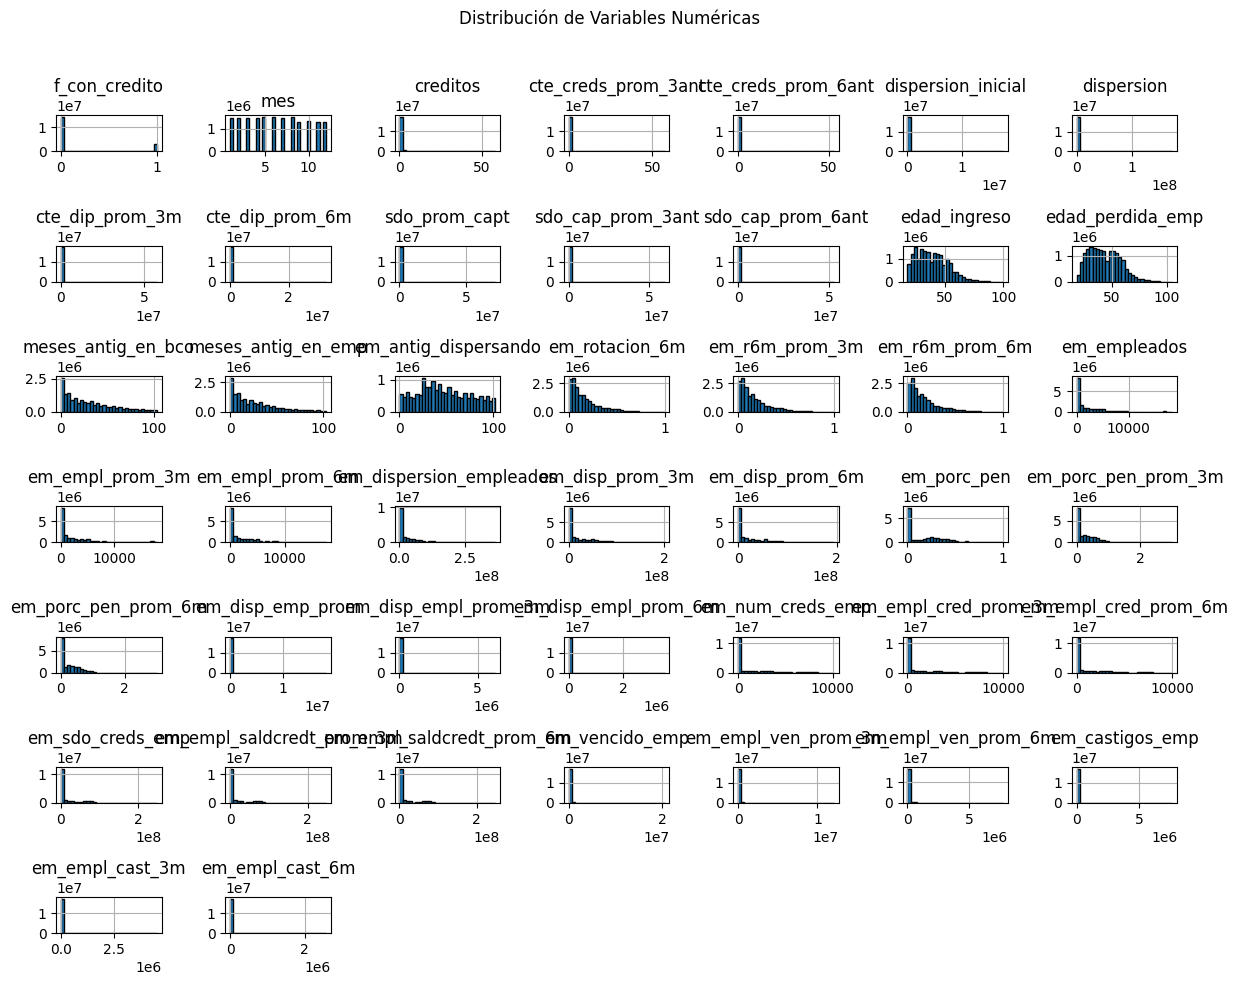

In [26]:
# Crear histogramas solo para las variables numéricas en la lista 'numericas'
datos_df[numericas].hist(figsize=(12, 10), bins=30, edgecolor='black')
# Título general para el gráfico
plt.suptitle("Distribución de Variables Numéricas")
# Ajustar espacio entre las subgráficas para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo
# Mostrar los gráficos
plt.show()

In [27]:
# comentario Filtrar DataFrames según el valor de 'target'
#df_target_0 = datos_df[datos_df['target'] == 0]
#df_target_1 = datos_df[datos_df['target'] == 1]

# comentario Crear un gráfico KDE para cada variable en 'numericas', separando por 'target'
#for col in numericas:
 #   plt.figure(figsize=(8, 4))

    # comentario KDE para target == 0
  #  sns.kdeplot(df_target_0[col], fill=True, label="target = 0", color='blue')

    # comentario KDE para target == 1
   # sns.kdeplot(df_target_1[col], fill=True, label="target = 1", color='red')

    # comentario Título y leyenda
    #plt.title(f"Distribución de {col} según target")
    #plt.legend()
    #plt.show()


In [28]:

## Outliers

# Usando el método IQR (Interquartile Range)
Q1 = datos_df[numericas].quantile(0.25)
Q3 = datos_df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtrar posibles outliers
outliers = ((datos_df[numericas] < (Q1 - 1.5 * IQR)) | (datos_df[numericas] > (Q3 + 1.5 * IQR))).sum()

# Mostrar el número de posibles outliers por variable
print("Número de posibles outliers por variable:")
print(outliers)


Número de posibles outliers por variable:
f_con_credito                3192246
mes                                0
creditos                     3192246
cte_creds_prom_3ant          3239504
cte_creds_prom_6ant          3297448
dispersion_inicial           1076742
dispersion                   1220879
cte_dip_prom_3m              1076949
cte_dip_prom_6m              1018457
sdo_prom_capt                2526872
sdo_cap_prom_3ant            2429883
sdo_cap_prom_6ant            2378445
edad_ingreso                   80239
edad_perdida_emp               66141
meses_antig_en_bco                 0
meses_antig_en_emp            357149
em_antig_dispersando               0
em_rotacion_6m                870450
em_r6m_prom_3m                849555
em_r6m_prom_6m                822547
em_empleados                  880146
em_empl_prom_3m               846706
em_empl_prom_6m               794358
em_dispersion_empleados      1261560
em_disp_prom_3m              1155365
em_disp_prom_6m              1134


 Análisis de la columna: target
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0
Valor maximo =  1
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 807448


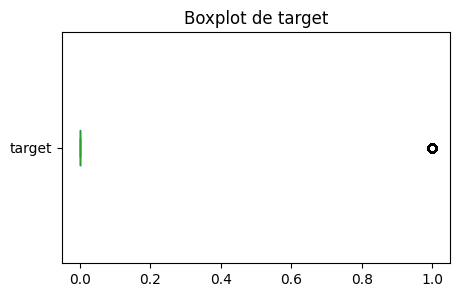

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.678151152078325 %

 Análisis de la columna: f_con_credito
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0
Valor maximo =  1
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 3192246


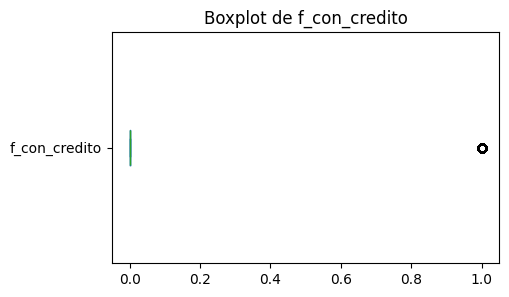

El porcentaje total de outliers (valores atípicos) en la columna age es: 18.49507250326637 %

 Análisis de la columna: mes
Cuartil 1=  3.0
Cuartil 3=  9.0
Rango intercuartilico=  6.0
Mediana =  6.0
Valor minimo =  1
Valor maximo =  12
El bigote superior de la gráfica de cajas es  18.0
El bigote inferior de la gráfica de cajas es  -6.0
los datos atípicos en esta columna son: 0


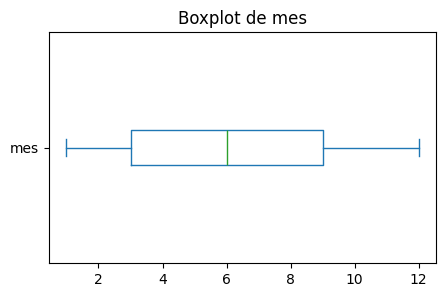

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.0 %

 Análisis de la columna: creditos
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0
Valor maximo =  58
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 3192246


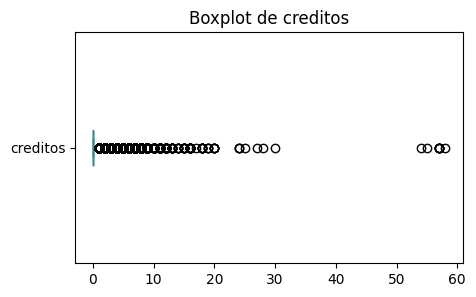

El porcentaje total de outliers (valores atípicos) en la columna age es: 18.49507250326637 %

 Análisis de la columna: cte_creds_prom_3ant
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0.0
Valor maximo =  57.333333333
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 3239504


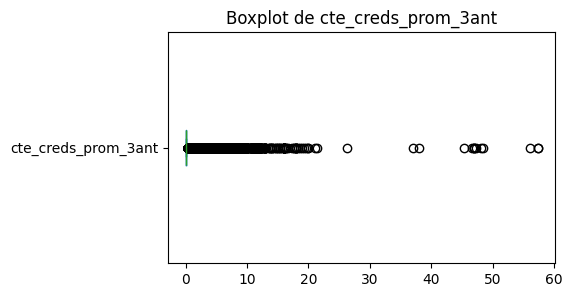

El porcentaje total de outliers (valores atípicos) en la columna age es: 18.768873499918683 %

 Análisis de la columna: cte_creds_prom_6ant
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0.0
Valor maximo =  52.666666667
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 3297448


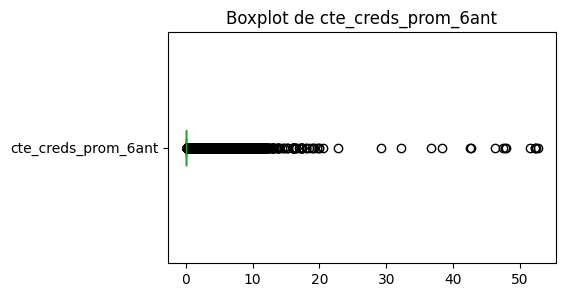

El porcentaje total de outliers (valores atípicos) en la columna age es: 19.104586499834504 %

 Análisis de la columna: dispersion_inicial
Cuartil 1=  4387.815
Cuartil 3=  10221.826667
Rango intercuartilico=  5834.011667
Mediana =  6630.0
Valor minimo =  0.0
Valor maximo =  17639078.283
El bigote superior de la gráfica de cajas es  18972.8441675
El bigote inferior de la gráfica de cajas es  -4363.2025005000005
los datos atípicos en esta columna son: 1076742


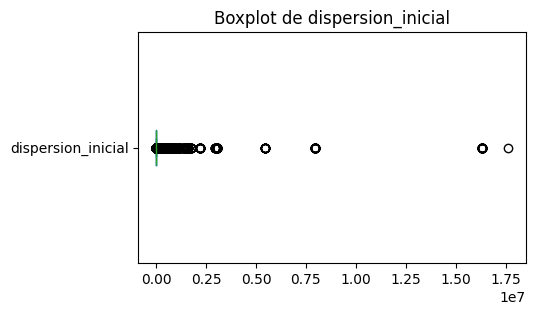

El porcentaje total de outliers (valores atípicos) en la columna age es: 6.238373031812723 %

 Análisis de la columna: dispersion
Cuartil 1=  5513.07
Cuartil 3=  13637.53
Rango intercuartilico=  8124.460000000001
Mediana =  8519.2
Valor minimo =  0.01
Valor maximo =  171943518.58
El bigote superior de la gráfica de cajas es  25824.22
El bigote inferior de la gráfica de cajas es  -6673.620000000003
los datos atípicos en esta columna son: 1220879


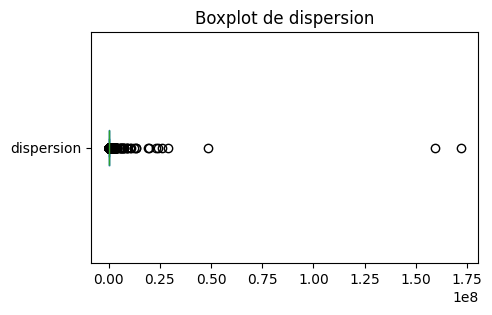

El porcentaje total de outliers (valores atípicos) en la columna age es: 7.073466650977194 %

 Análisis de la columna: cte_dip_prom_3m
Cuartil 1=  5657.5033333
Cuartil 3=  13955.666667
Rango intercuartilico=  8298.163333699998
Mediana =  8785.2666667
Valor minimo =  0.0
Valor maximo =  57511846.787
El bigote superior de la gráfica de cajas es  26402.911667549997
El bigote inferior de la gráfica de cajas es  -6789.741667249998
los datos atípicos en esta columna son: 1076949


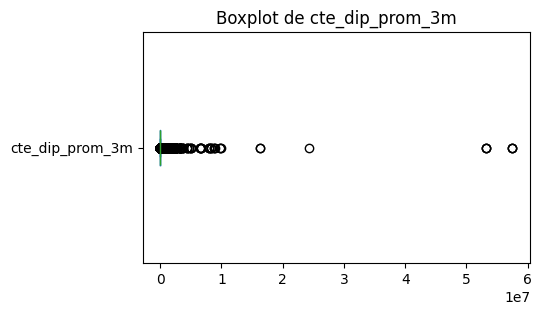

El porcentaje total de outliers (valores atípicos) en la columna age es: 6.239572337883802 %

 Análisis de la columna: cte_dip_prom_6m
Cuartil 1=  5676.12
Cuartil 3=  13889.076667
Rango intercuartilico=  8212.956666999999
Mediana =  8813.295
Valor minimo =  0.0
Valor maximo =  32744043.272
El bigote superior de la gráfica de cajas es  26208.511667499995
El bigote inferior de la gráfica de cajas es  -6643.315000499998
los datos atípicos en esta columna son: 1018457


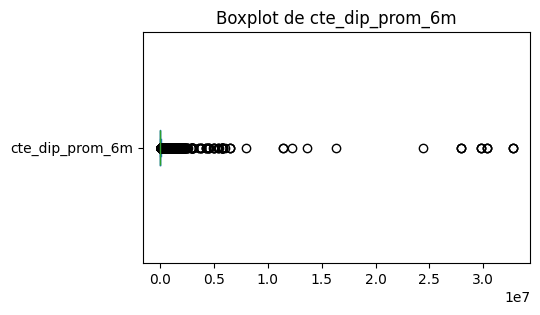

El porcentaje total de outliers (valores atípicos) en la columna age es: 5.900684363441652 %

 Análisis de la columna: sdo_prom_capt
Cuartil 1=  178.22
Cuartil 3=  2620.06
Rango intercuartilico=  2441.84
Mediana =  691.52
Valor minimo =  0.0
Valor maximo =  72179291.15
El bigote superior de la gráfica de cajas es  6282.82
El bigote inferior de la gráfica de cajas es  -3484.5400000000004
los datos atípicos en esta columna son: 2526872


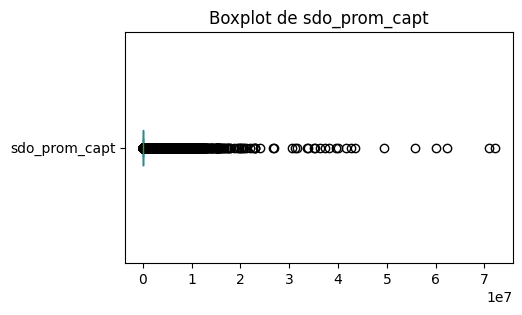

El porcentaje total de outliers (valores atípicos) en la columna age es: 14.64006246588568 %

 Análisis de la columna: sdo_cap_prom_3ant
Cuartil 1=  246.77
Cuartil 3=  2800.63
Rango intercuartilico=  2553.86
Mediana =  788.55
Valor minimo =  0.0
Valor maximo =  59479868.07
El bigote superior de la gráfica de cajas es  6631.42
El bigote inferior de la gráfica de cajas es  -3584.02
los datos atípicos en esta columna son: 2429883


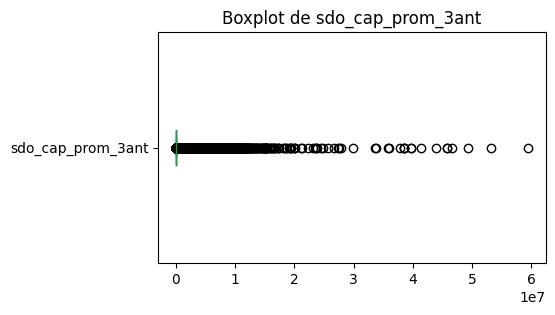

El porcentaje total de outliers (valores atípicos) en la columna age es: 14.078132530968604 %

 Análisis de la columna: sdo_cap_prom_6ant
Cuartil 1=  279.86333333
Cuartil 3=  2898.8416667
Rango intercuartilico=  2618.97833337
Mediana =  842.73333333
Valor minimo =  0.0
Valor maximo =  52635542.125
El bigote superior de la gráfica de cajas es  6827.309166755001
El bigote inferior de la gráfica de cajas es  -3648.6041667250006
los datos atípicos en esta columna son: 2378445


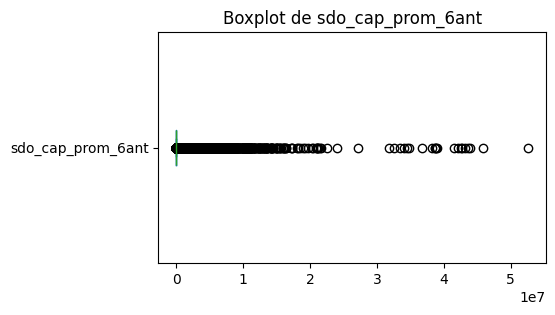

El porcentaje total de outliers (valores atípicos) en la columna age es: 13.780113662929294 %

 Análisis de la columna: edad_ingreso
Cuartil 1=  28.0
Cuartil 3=  48.0
Rango intercuartilico=  20.0
Mediana =  38.0
Valor minimo =  18
Valor maximo =  100
El bigote superior de la gráfica de cajas es  78.0
El bigote inferior de la gráfica de cajas es  -2.0
los datos atípicos en esta columna son: 80239


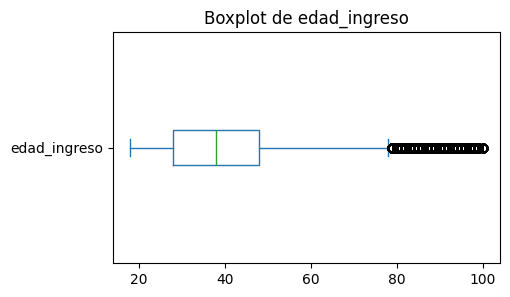

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.46488463689502324 %

 Análisis de la columna: edad_perdida_emp
Cuartil 1=  32.0
Cuartil 3=  53.0
Rango intercuartilico=  21.0
Mediana =  42.0
Valor minimo =  18
Valor maximo =  105
El bigote superior de la gráfica de cajas es  84.5
El bigote inferior de la gráfica de cajas es  0.5
los datos atípicos en esta columna son: 66141


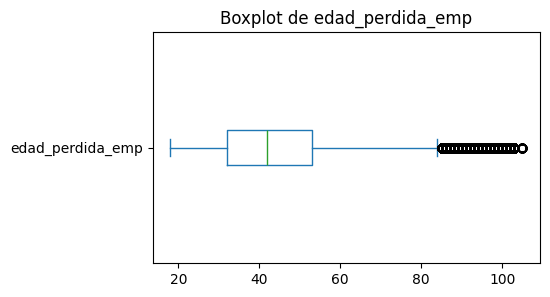

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.3832043615806993 %

 Análisis de la columna: meses_antig_en_bco
Cuartil 1=  7.0
Cuartil 3=  46.0
Rango intercuartilico=  39.0
Mediana =  24.0
Valor minimo =  0
Valor maximo =  103
El bigote superior de la gráfica de cajas es  104.5
El bigote inferior de la gráfica de cajas es  -51.5
los datos atípicos en esta columna son: 0


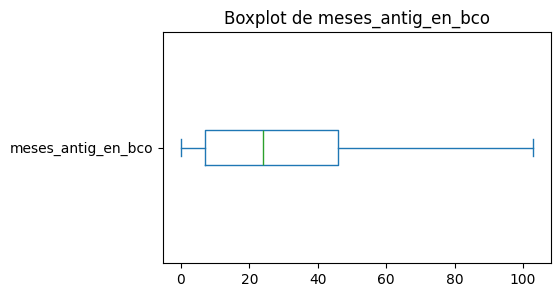

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.0 %

 Análisis de la columna: meses_antig_en_emp
Cuartil 1=  6.0
Cuartil 3=  40.0
Rango intercuartilico=  34.0
Mediana =  20.0
Valor minimo =  0
Valor maximo =  103
El bigote superior de la gráfica de cajas es  91.0
El bigote inferior de la gráfica de cajas es  -45.0
los datos atípicos en esta columna son: 357149


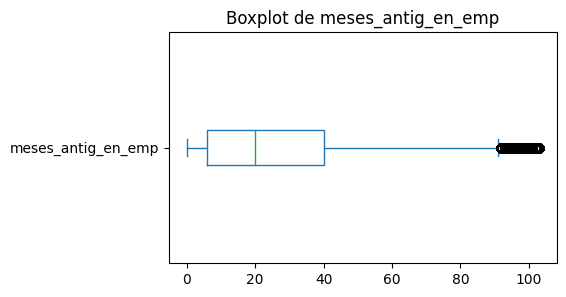

El porcentaje total de outliers (valores atípicos) en la columna age es: 2.0692317100464943 %

 Análisis de la columna: em_antig_dispersando
Cuartil 1=  26.0
Cuartil 3=  69.0
Rango intercuartilico=  43.0
Mediana =  44.0
Valor minimo =  0
Valor maximo =  102
El bigote superior de la gráfica de cajas es  133.5
El bigote inferior de la gráfica de cajas es  -38.5
los datos atípicos en esta columna son: 0


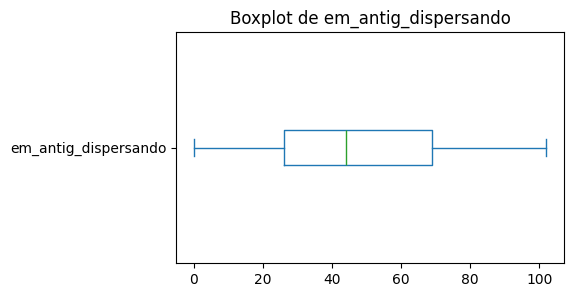

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.0 %

 Análisis de la columna: em_rotacion_6m
Cuartil 1=  0.048387
Cuartil 3=  0.23523
Rango intercuartilico=  0.18684299999999998
Mediana =  0.116279
Valor minimo =  0.0
Valor maximo =  1.0
El bigote superior de la gráfica de cajas es  0.5154945
El bigote inferior de la gráfica de cajas es  -0.23187749999999996
los datos atípicos en esta columna son: 870450


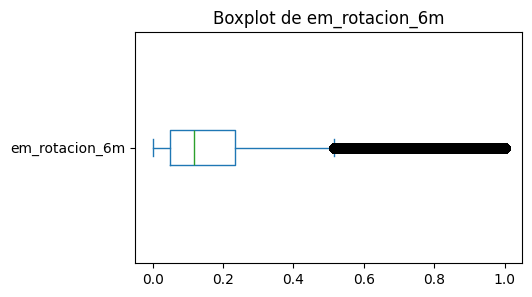

El porcentaje total de outliers (valores atípicos) en la columna age es: 5.043168935122234 %

 Análisis de la columna: em_r6m_prom_3m
Cuartil 1=  0.050279
Cuartil 3=  0.2368966667
Rango intercuartilico=  0.18661766670000002
Mediana =  0.120537
Valor minimo =  0.0
Valor maximo =  1.0
El bigote superior de la gráfica de cajas es  0.5168231667500001
El bigote inferior de la gráfica de cajas es  -0.22964750005000004
los datos atípicos en esta columna son: 849555


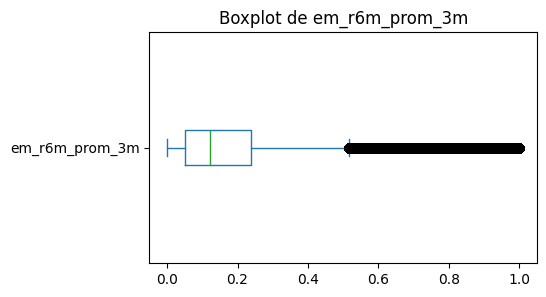

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.922108546932931 %

 Análisis de la columna: em_r6m_prom_6m
Cuartil 1=  0.0525188333
Cuartil 3=  0.2391835
Rango intercuartilico=  0.18666466669999998
Mediana =  0.1246795
Valor minimo =  0.0
Valor maximo =  1.0
El bigote superior de la gráfica de cajas es  0.5191805000499999
El bigote inferior de la gráfica de cajas es  -0.22747816674999993
los datos atípicos en esta columna son: 822547


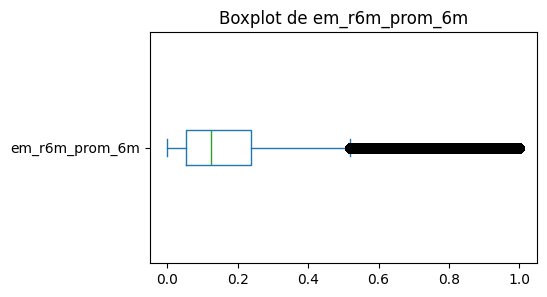

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.76563097027743 %

 Análisis de la columna: em_empleados
Cuartil 1=  131.0
Cuartil 3=  3504.0
Rango intercuartilico=  3373.0
Mediana =  755.0
Valor minimo =  0
Valor maximo =  18402
El bigote superior de la gráfica de cajas es  8563.5
El bigote inferior de la gráfica de cajas es  -4928.5
los datos atípicos en esta columna son: 880146


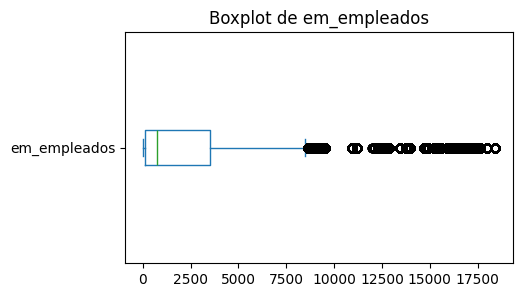

El porcentaje total de outliers (valores atípicos) en la columna age es: 5.099345126741449 %

 Análisis de la columna: em_empl_prom_3m
Cuartil 1=  129.33333333
Cuartil 3=  3488.6666667
Rango intercuartilico=  3359.3333333699998
Mediana =  744.33333333
Valor minimo =  0.0
Valor maximo =  18003.666667
El bigote superior de la gráfica de cajas es  8527.666666755
El bigote inferior de la gráfica de cajas es  -4909.666666725
los datos atípicos en esta columna son: 846706


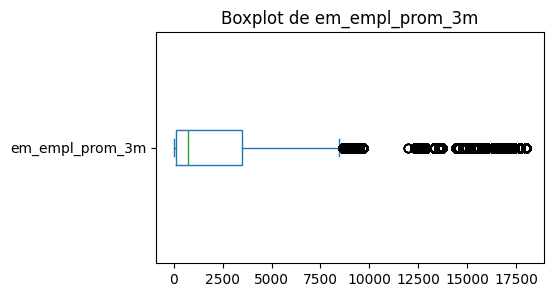

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.905602155645479 %

 Análisis de la columna: em_empl_prom_6m
Cuartil 1=  128.33333333
Cuartil 3=  3468.5
Rango intercuartilico=  3340.16666667
Mediana =  737.66666667
Valor minimo =  0.0
Valor maximo =  17605.0
El bigote superior de la gráfica de cajas es  8478.750000004999
El bigote inferior de la gráfica de cajas es  -4881.916666675
los datos atípicos en esta columna son: 794358


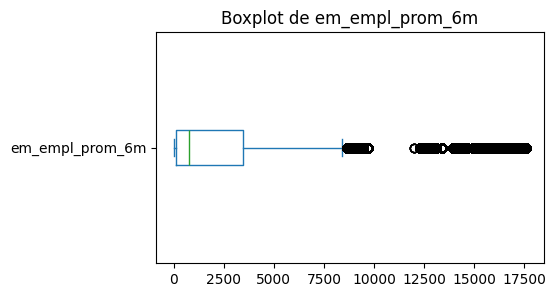

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.602310975892731 %

 Análisis de la columna: em_dispersion_empleados
Cuartil 1=  1040464.8
Cuartil 3=  41205318.03
Rango intercuartilico=  40164853.230000004
Mediana =  7251223.55
Valor minimo =  0.0
Valor maximo =  364306551.59
El bigote superior de la gráfica de cajas es  101452597.875
El bigote inferior de la gráfica de cajas es  -59206815.04500001
los datos atípicos en esta columna son: 1261560


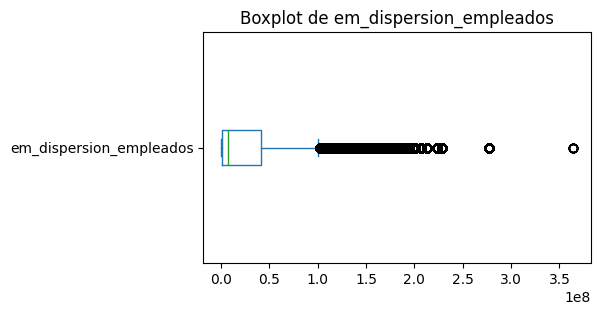

El porcentaje total de outliers (valores atípicos) en la columna age es: 7.309162159564369 %

 Análisis de la columna: em_disp_prom_3m
Cuartil 1=  1033192.5533
Cuartil 3=  41698891.303
Rango intercuartilico=  40665698.7497
Mediana =  7219380.7633
Valor minimo =  0.0
Valor maximo =  200353300.03
El bigote superior de la gráfica de cajas es  102697439.42755
El bigote inferior de la gráfica de cajas es  -59965355.57125
los datos atípicos en esta columna son: 1155365


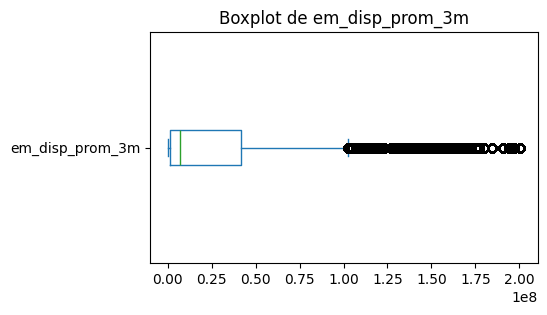

El porcentaje total de outliers (valores atípicos) en la columna age es: 6.6938949701045445 %

 Análisis de la columna: em_disp_prom_6m
Cuartil 1=  1014442.5983
Cuartil 3=  40817974.308
Rango intercuartilico=  39803531.709699996
Mediana =  7028247.0267
Valor minimo =  0.0
Valor maximo =  194196138.23
El bigote superior de la gráfica de cajas es  100523271.87255
El bigote inferior de la gráfica de cajas es  -58690854.966249995
los datos atípicos en esta columna son: 1134292


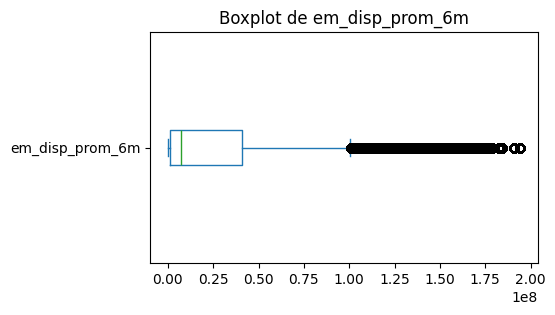

El porcentaje total de outliers (valores atípicos) en la columna age es: 6.571803294569096 %

 Análisis de la columna: em_porc_pen
Cuartil 1=  0.0
Cuartil 3=  0.3189655172
Rango intercuartilico=  0.3189655172
Mediana =  0.1315789474
Valor minimo =  0.0
Valor maximo =  1.0
El bigote superior de la gráfica de cajas es  0.797413793
El bigote inferior de la gráfica de cajas es  -0.4784482758
los datos atípicos en esta columna son: 1616


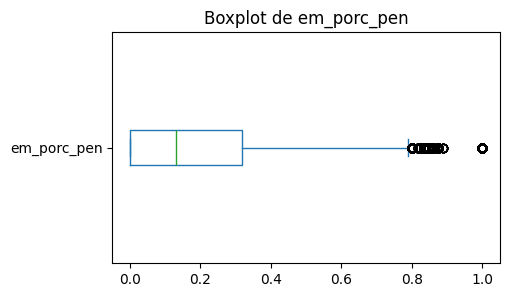

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.009362698603202402 %

 Análisis de la columna: em_porc_pen_prom_3m
Cuartil 1=  0.0
Cuartil 3=  0.4283818495
Rango intercuartilico=  0.4283818495
Mediana =  0.1540722044
Valor minimo =  0.0
Valor maximo =  3.0
El bigote superior de la gráfica de cajas es  1.07095462375
El bigote inferior de la gráfica de cajas es  -0.64257277425
los datos atípicos en esta columna son: 11657


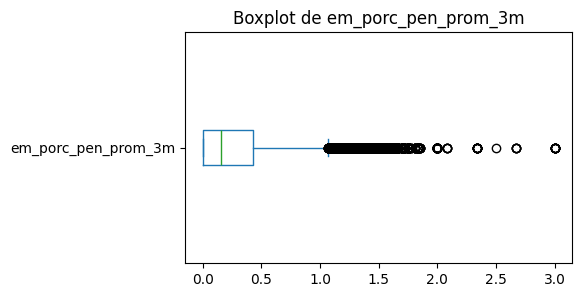

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.06753773367421437 %

 Análisis de la columna: em_porc_pen_prom_6m
Cuartil 1=  0.0
Cuartil 3=  0.4219252803
Rango intercuartilico=  0.4219252803
Mediana =  0.1518555483
Valor minimo =  0.0
Valor maximo =  3.0
El bigote superior de la gráfica de cajas es  1.05481320075
El bigote inferior de la gráfica de cajas es  -0.63288792045
los datos atípicos en esta columna son: 13244


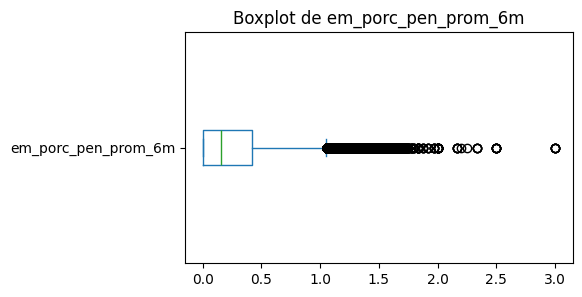

El porcentaje total de outliers (valores atípicos) en la columna age es: 0.07673241355248304 %

 Análisis de la columna: em_disp_emp_prom
Cuartil 1=  7047.116087
Cuartil 3=  12819.50455
Rango intercuartilico=  5772.388462999999
Mediana =  9746.1533722
Valor minimo =  0.0
Valor maximo =  18215327.58
El bigote superior de la gráfica de cajas es  21478.0872445
El bigote inferior de la gráfica de cajas es  -1611.4666074999986
los datos atípicos en esta columna son: 716566


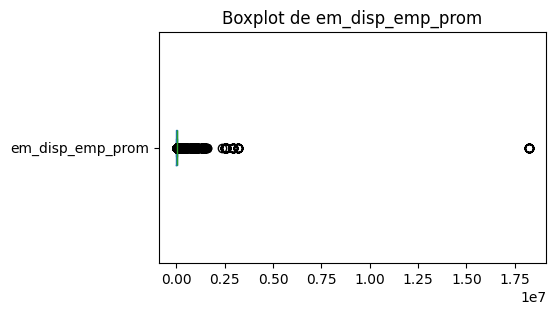

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.151603643132631 %

 Análisis de la columna: em_disp_empl_prom_3m
Cuartil 1=  7121.7701604
Cuartil 3=  12970.818487
Rango intercuartilico=  5849.0483266
Mediana =  9765.0392102
Valor minimo =  0.0
Valor maximo =  6120526.9155
El bigote superior de la gráfica de cajas es  21744.390976900002
El bigote inferior de la gráfica de cajas es  -1651.8023294999994
los datos atípicos en esta columna son: 569127


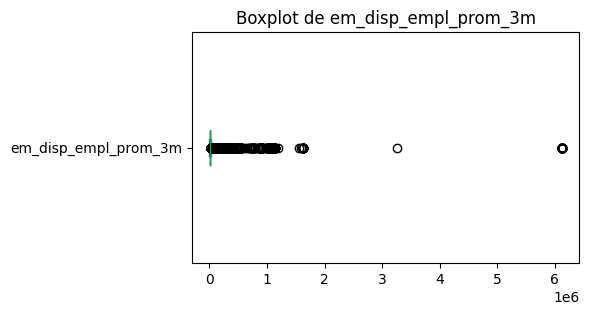

El porcentaje total de outliers (valores atípicos) en la columna age es: 3.297379064322261 %

 Análisis de la columna: em_disp_empl_prom_6m
Cuartil 1=  7108.2991251
Cuartil 3=  12832.510392
Rango intercuartilico=  5724.2112669
Mediana =  9745.2779142
Valor minimo =  0.0
Valor maximo =  3503533.301
El bigote superior de la gráfica de cajas es  21418.82729235
El bigote inferior de la gráfica de cajas es  -1478.0177752500003
los datos atípicos en esta columna son: 591415


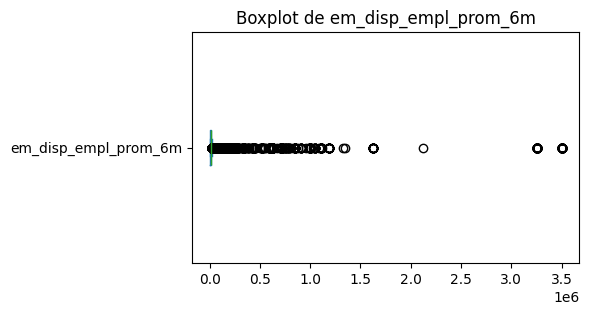

El porcentaje total de outliers (valores atípicos) en la columna age es: 3.426510145057518 %

 Análisis de la columna: em_num_creds_emp
Cuartil 1=  0.0
Cuartil 3=  1012.0
Rango intercuartilico=  1012.0
Mediana =  22.0
Valor minimo =  0
Valor maximo =  10113
El bigote superior de la gráfica de cajas es  2530.0
El bigote inferior de la gráfica de cajas es  -1518.0
los datos atípicos en esta columna son: 2418510


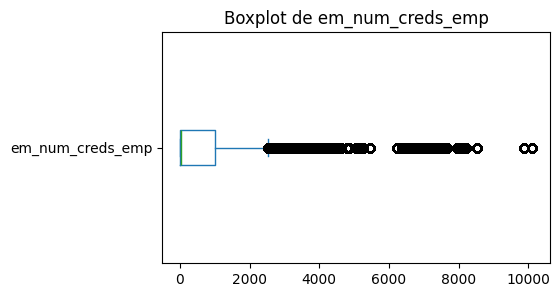

El porcentaje total de outliers (valores atípicos) en la columna age es: 14.012240222048911 %

 Análisis de la columna: em_empl_cred_prom_3m
Cuartil 1=  0.0
Cuartil 3=  1000.3333333
Rango intercuartilico=  1000.3333333
Mediana =  21.666666667
Valor minimo =  0.0
Valor maximo =  9995.5
El bigote superior de la gráfica de cajas es  2500.83333325
El bigote inferior de la gráfica de cajas es  -1500.49999995
los datos atípicos en esta columna son: 2467355


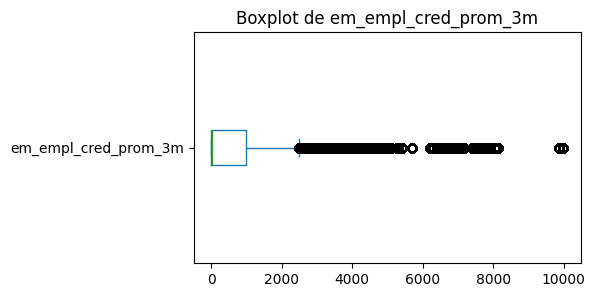

El porcentaje total de outliers (valores atípicos) en la columna age es: 14.295235898579495 %

 Análisis de la columna: em_empl_cred_prom_6m
Cuartil 1=  0.0
Cuartil 3=  994.0
Rango intercuartilico=  994.0
Mediana =  21.5
Valor minimo =  0.0
Valor maximo =  9995.5
El bigote superior de la gráfica de cajas es  2485.0
El bigote inferior de la gráfica de cajas es  -1491.0
los datos atípicos en esta columna son: 2417024


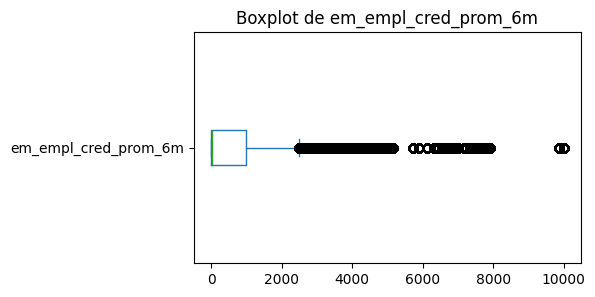

El porcentaje total de outliers (valores atípicos) en la columna age es: 14.003630710833342 %

 Análisis de la columna: em_sdo_creds_emp
Cuartil 1=  0.0
Cuartil 3=  15194139.78
Rango intercuartilico=  15194139.78
Mediana =  169003.9
Valor minimo =  0.0
Valor maximo =  247915311.71
El bigote superior de la gráfica de cajas es  37985349.449999996
El bigote inferior de la gráfica de cajas es  -22791209.669999998
los datos atípicos en esta columna son: 2727641


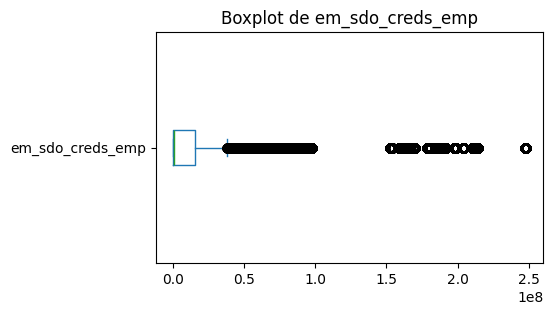

El porcentaje total de outliers (valores atípicos) en la columna age es: 15.803267686100003 %

 Análisis de la columna: em_empl_saldcredt_prom_3m
Cuartil 1=  0.0
Cuartil 3=  15072141.817
Rango intercuartilico=  15072141.817
Mediana =  163795.73333
Valor minimo =  0.0
Valor maximo =  247785827.21
El bigote superior de la gráfica de cajas es  37680354.5425
El bigote inferior de la gráfica de cajas es  -22608212.7255
los datos atípicos en esta columna son: 2707860


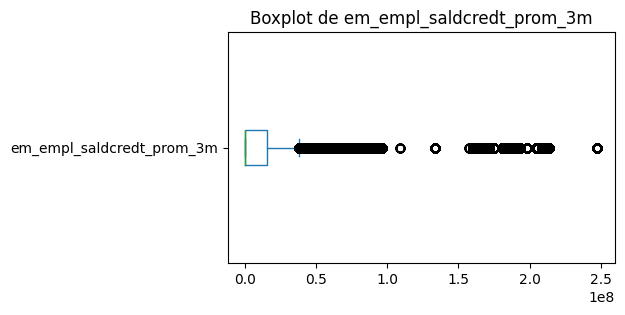

El porcentaje total de outliers (valores atípicos) en la columna age es: 15.688661534447807 %

 Análisis de la columna: em_empl_saldcredt_prom_6m
Cuartil 1=  0.0
Cuartil 3=  14967672.708
Rango intercuartilico=  14967672.708
Mediana =  158484.5
Valor minimo =  0.0
Valor maximo =  247785827.21
El bigote superior de la gráfica de cajas es  37419181.769999996
El bigote inferior de la gráfica de cajas es  -22451509.062
los datos atípicos en esta columna son: 2680907


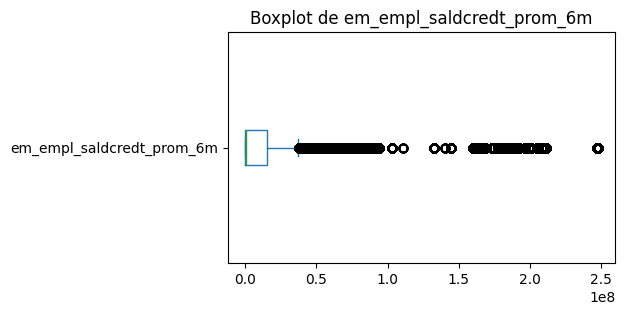

El porcentaje total de outliers (valores atípicos) en la columna age es: 15.532502613994767 %

 Análisis de la columna: em_vencido_emp
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0.0
Valor maximo =  20556076.42
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 2652349


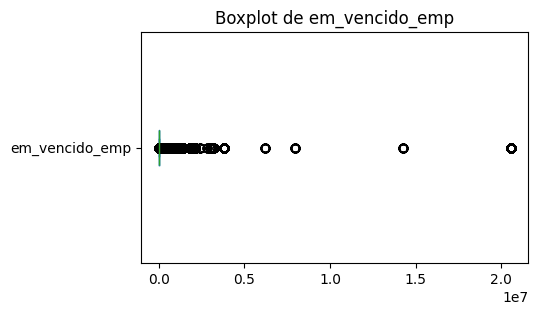

El porcentaje total de outliers (valores atípicos) en la columna age es: 15.367044726179016 %

 Análisis de la columna: em_empl_ven_prom_3m
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  0.0
Valor maximo =  12076661.983
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 3539044


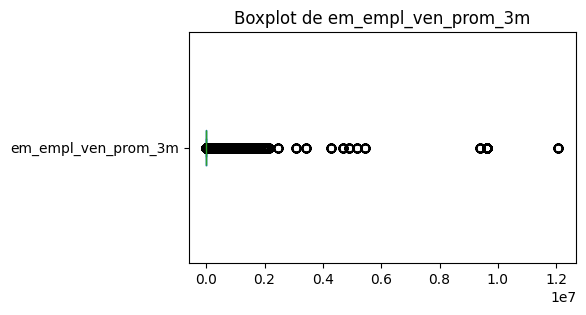

El porcentaje total de outliers (valores atípicos) en la columna age es: 20.504333116009803 %

 Análisis de la columna: em_empl_ven_prom_6m
Cuartil 1=  0.0
Cuartil 3=  288.1
Rango intercuartilico=  288.1
Mediana =  0.0
Valor minimo =  0.0
Valor maximo =  7754908.595
El bigote superior de la gráfica de cajas es  720.25
El bigote inferior de la gráfica de cajas es  -432.15000000000003
los datos atípicos en esta columna son: 4132689


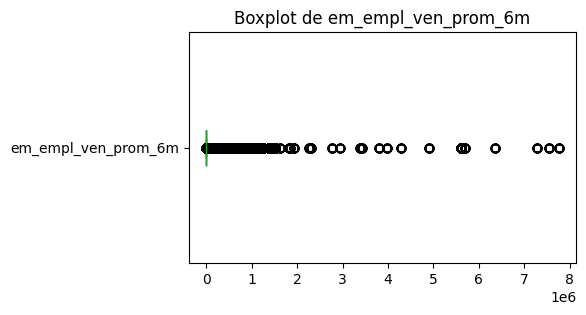

El porcentaje total de outliers (valores atípicos) en la columna age es: 23.94376332163981 %

 Análisis de la columna: em_castigos_emp
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  -24.35
Valor maximo =  7629429.98
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 738104


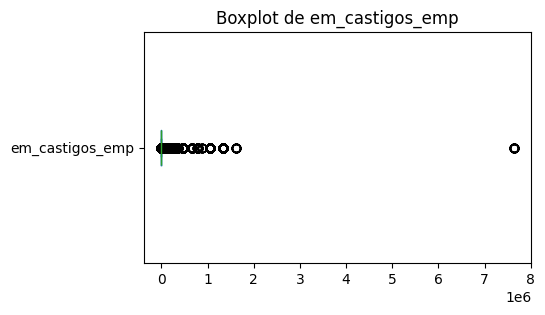

El porcentaje total de outliers (valores atípicos) en la columna age es: 4.2763894120161545 %

 Análisis de la columna: em_empl_cast_3m
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  -24.35
Valor maximo =  4475940.295
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 1534882


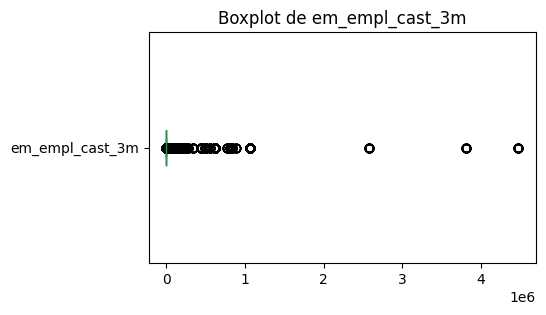

El porcentaje total de outliers (valores atípicos) en la columna age es: 8.892721260817146 %

 Análisis de la columna: em_empl_cast_6m
Cuartil 1=  0.0
Cuartil 3=  0.0
Rango intercuartilico=  0.0
Mediana =  0.0
Valor minimo =  -24.35
Valor maximo =  2577765.35
El bigote superior de la gráfica de cajas es  0.0
El bigote inferior de la gráfica de cajas es  0.0
los datos atípicos en esta columna son: 2412574


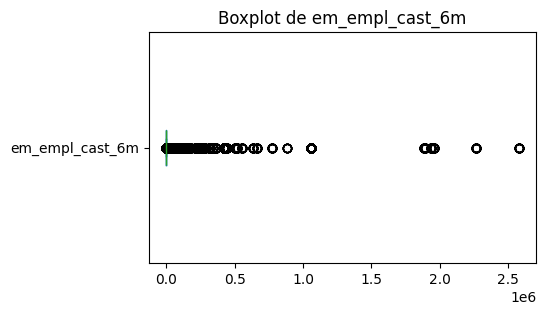

El porcentaje total de outliers (valores atípicos) en la columna age es: 13.977848527179724 %


In [29]:
columnas_numericas = datos_df.select_dtypes(include=["number"]).columns

#Calculando los datos
for col_num in columnas_numericas:
  print(f"\n Análisis de la columna: {col_num}")
  Q1p = datos_df[col_num].quantile(0.25)
  print("Cuartil 1= ", Q1p)
  Q3p = datos_df[col_num].quantile(0.75)
  print("Cuartil 3= ", Q3p)
  IQp = Q3p-Q1p
  print("Rango intercuartilico= ", IQp)
  Medianap = datos_df[col_num].median()
  print("Mediana = ", Medianap)
  Minp = datos_df[col_num].min()
  print("Valor minimo = ", Minp)
  Maxp = datos_df[col_num].max()
  print("Valor maximo = ", Maxp)

  #Calculando bigote superior e inferior
  lsp = (Q3p + 1.5*IQp)
  print("El bigote superior de la gráfica de cajas es ", lsp)
  lip = (Q1p - 1.5*IQp)
  print("El bigote inferior de la gráfica de cajas es ", lip)

  #Ubicando los outliers en cada columna numérica
  ubicacionp = (datos_df[col_num] <lip) | (datos_df[col_num]>lsp)

  #Obteniendo los outliers (datos atípicos) de price
  outliersp = datos_df[col_num][ubicacionp]

  #Contando los outliers
  print("los datos atípicos en esta columna son:", outliersp.count())

  #Diagrama de caja
  plt.figure(figsize=(5, 3))
  datos_df[col_num].plot(kind="box", vert=False)
  plt.title(f"Boxplot de {col_num}")
  plt.show()

  #Calculando % de valores atípicos
  num_registrosa = datos_df[col_num].count().sum()
  num_registrosa
  porc_outl_a= outliersp.count()/num_registrosa
  print("El porcentaje total de outliers (valores atípicos) en la columna age es:",(porc_outl_a)*100,"%")

  #SE PUEDEN RELLENAR O ELIMINAR ESTOS VALORES ATÍPICOS, SERÁ DECISIÓN DE VER QUÉ PODEMOS HACER CON ESTOS DATOS

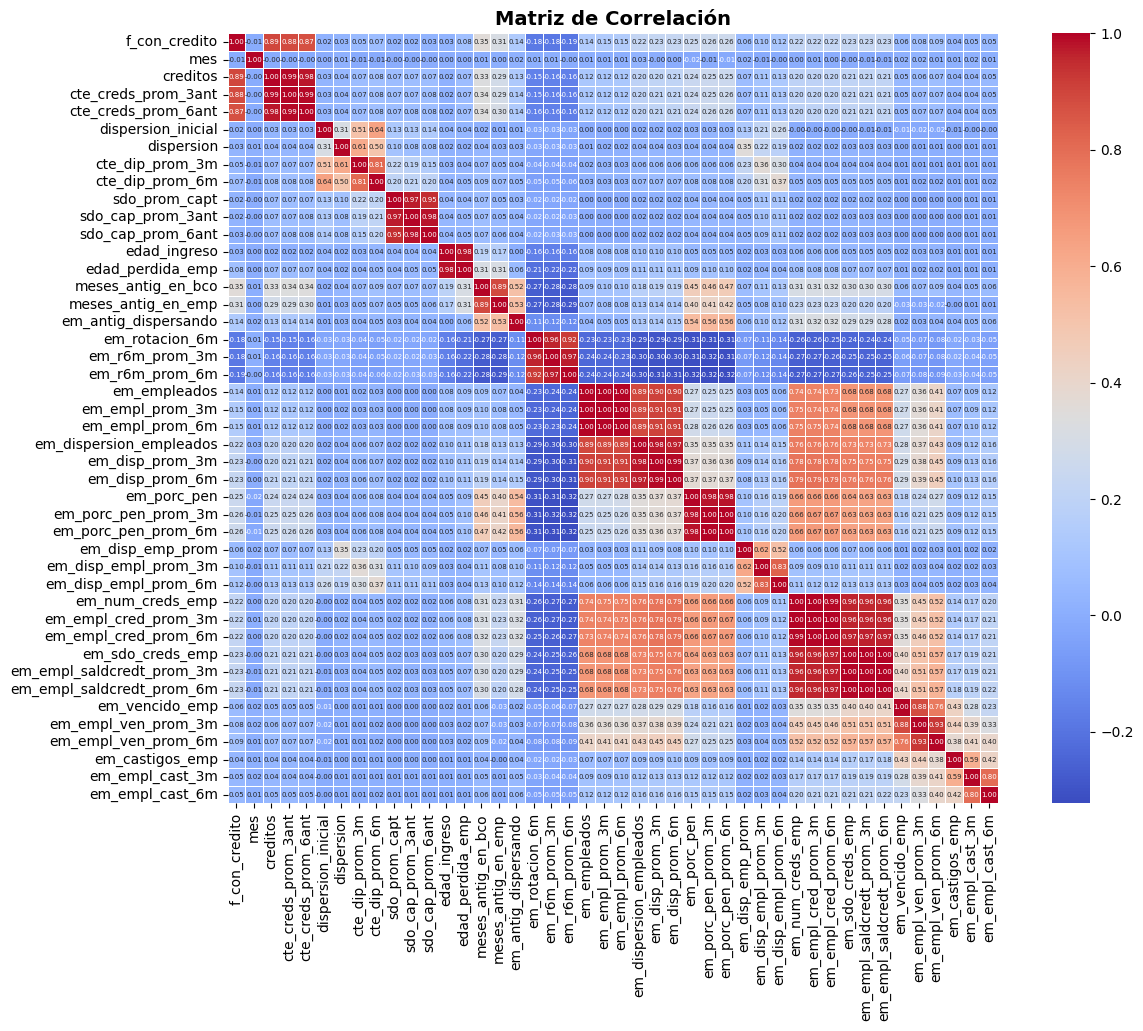

In [30]:
#Correlación de variables numéricas

corr = datos_df[numericas].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar=True, annot_kws={"size": 5})
plt.title("Matriz de Correlación", fontsize=14, fontweight='bold')
plt.show()

In [31]:
# Gráficos de barras para variables categóricas

#for col in categoricas:
 #   if col in datos_df.columns:  # Verifica que la columna existe antes de graficar
  #      plt.figure(figsize=(8, 4))
   #     sns.countplot(y=datos_df[col], order=datos_df[col].value_counts().index)
    #    plt.title(f"Frecuencia de {col}")
     #   plt.show()
    #else:
     #   print(f"La columna {col} no está en el DataFrame")

In [32]:
categoricas

['em_segmento', 'em_tipo_gob', 'genero', 'mes', 'target', 'f_con_credito']

In [33]:
#categoricas = ['em_segmento', 'genero', 'mes', 'target','f_con_credito']
#categoricas = ['em_segmento', 'genero', 'mes_informacion', 'target','f_con_credito']

In [34]:
categoricas = [col for col in categoricas if col in datos_df.columns]

In [35]:
datos_df[categoricas].describe(include="object").T

,count,unique,top,freq
em_segmento,17259981,12,PYME,6453965
genero,17259967,3,M,17258400


In [36]:
datos_df[categoricas].describe().T

,count,mean,std,min,25%,50%,75%,max
mes,17259981.0,6.348277,3.404001,1.0,3.0,6.0,9.0,12.0
target,17259981.0,0.046782,0.211171,0.0,0.0,0.0,0.0,1.0
f_con_credito,17259981.0,0.184951,0.388258,0.0,0.0,0.0,0.0,1.0



Análisis de la columna: em_segmento
Frecuencia:
 em_segmento
PYME                6453965
MUNICIPAL           4067636
ESTATAL             2458230
EMPRESAS            2205989
CORPORATIVA         1312404
RELACIONADA          308412
PRIVADA              250231
FEDERAL              196056
AFIRME                 3693
INCLUSION SOCIAL       2780
FIDEICOMISO             318
ALIANZAS                267
Name: count, dtype: int64
Porcentaje:
 em_segmento
PYME                37.392654
MUNICIPAL           23.566863
ESTATAL             14.242368
EMPRESAS            12.780947
CORPORATIVA          7.603740
RELACIONADA          1.786862
PRIVADA              1.449776
FEDERAL              1.135899
AFIRME               0.021396
INCLUSION SOCIAL     0.016107
FIDEICOMISO          0.001842
ALIANZAS             0.001547
Name: proportion, dtype: float64


<ipython-input-37-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


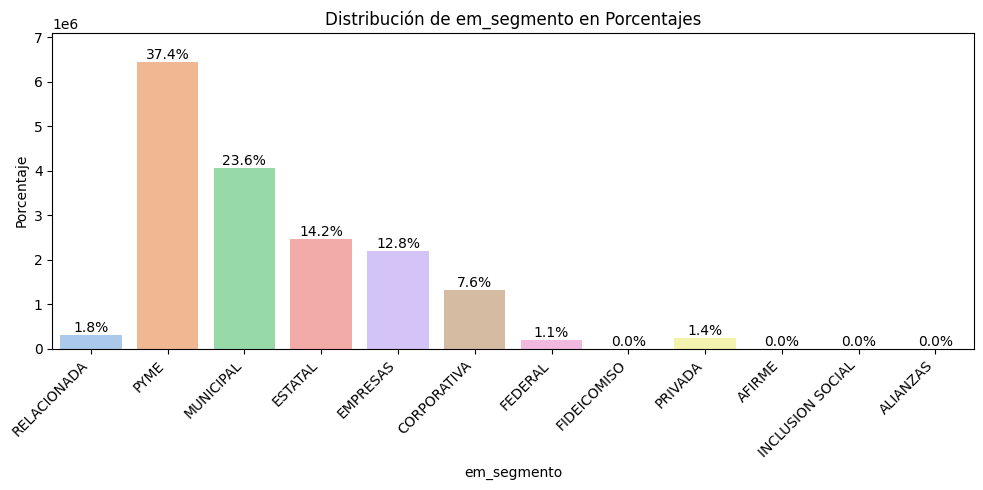


Análisis de la columna: genero
Frecuencia:
 genero
M       17258400
Otro        1534
R             33
Name: count, dtype: int64
Porcentaje:
 genero
M       99.990921
Otro     0.008888
R        0.000191
Name: proportion, dtype: float64


<ipython-input-37-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


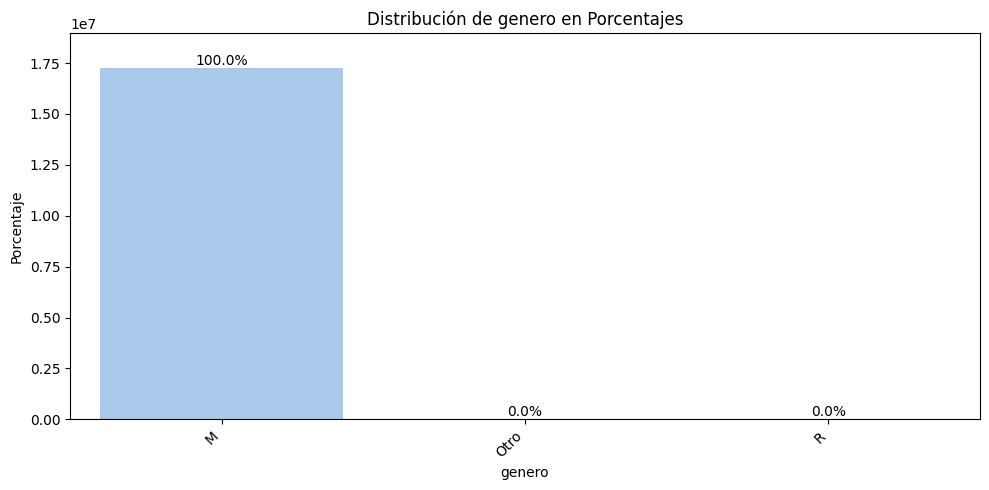


Análisis de la columna: mes
Frecuencia:
 mes
8     1517337
6     1511535
5     1510183
3     1503026
4     1500876
7     1492504
2     1476866
1     1465038
10    1334520
11    1326673
9     1320748
12    1300675
Name: count, dtype: int64
Porcentaje:
 mes
8     8.791070
6     8.757455
5     8.749621
3     8.708156
4     8.695699
7     8.647194
2     8.556591
1     8.488063
10    7.731874
11    7.686411
9     7.652083
12    7.535785
Name: proportion, dtype: float64


<ipython-input-37-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


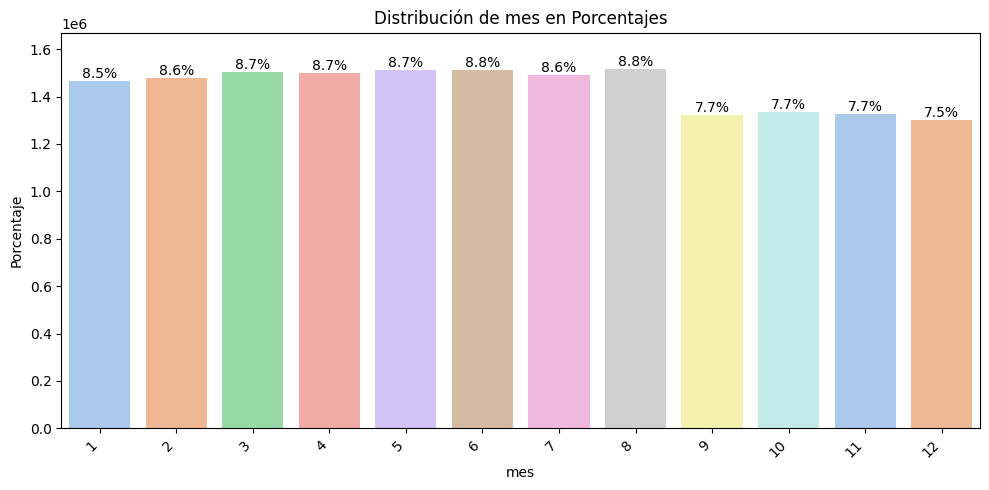


Análisis de la columna: target
Frecuencia:
 target
0    16452533
1      807448
Name: count, dtype: int64
Porcentaje:
 target
0    95.321849
1     4.678151
Name: proportion, dtype: float64


<ipython-input-37-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


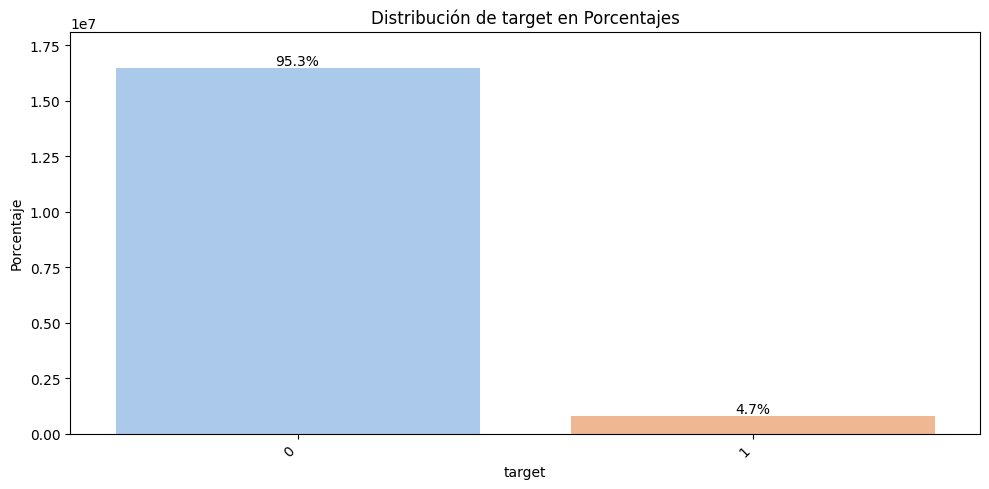


Análisis de la columna: f_con_credito
Frecuencia:
 f_con_credito
0    14067735
1     3192246
Name: count, dtype: int64
Porcentaje:
 f_con_credito
0    81.504927
1    18.495073
Name: proportion, dtype: float64


<ipython-input-37-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


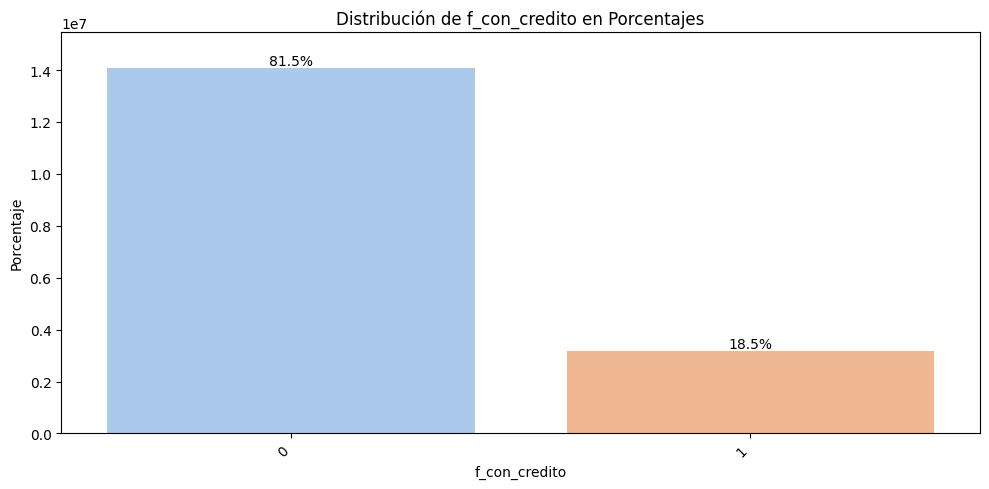

In [37]:
for col_cat in categoricas:
    plt.figure(figsize=(10, 5))  # Ajustar tamaño de la figura

    # Calcular frecuencia y porcentaje
    frecuencia = datos_df[col_cat].value_counts()
    porcentaje = datos_df[col_cat].value_counts(normalize=True) * 100  # Convertir a porcentaje

    print(f"\nAnálisis de la columna: {col_cat}")
    print("Frecuencia:\n", frecuencia)
    print("Porcentaje:\n", porcentaje)

    # Gráfico de barras con proporciones
    ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")

    # Agregar etiquetas de porcentaje sobre las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()/len(datos_df)*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Distribución de {col_cat} en Porcentajes")
    plt.ylabel("Porcentaje")
    plt.xlabel(col_cat)

    # Ajuste para evitar que los nombres de las categorías se encimen
    plt.xticks(rotation=45, ha="right")  # Rota etiquetas y las alinea a la derecha si es necesario

    plt.ylim(0, max(frecuencia) * 1.1)  # Ajuste de escala para etiquetas
    plt.tight_layout()  # Optimiza el espacio de la gráfica
    plt.show()

In [38]:
# comentario Análisis bivariado con gráfico de barras


#for columna_1 in categoricas:
 #   for columna_2 in categoricas:
  #      if columna_1 != columna_2:
   #         plt.figure(figsize=(12, 6))  # Ajuste del tamaño de la figura

#            ax = sns.countplot(x=columna_1, hue=columna_2, data=datos_df, palette="pastel")

 #           plt.title(f"Distribución de {columna_1} según {columna_2}")

            # comentario Rota las etiquetas del eje X si hay muchas categorías
   #         plt.xticks(rotation=45, ha="right")

    #        plt.xlabel(columna_1)
     #       plt.ylabel("Frecuencia")

            # comentario Ajusta automáticamente la disposición de los elementos en la figura
         #   plt.tight_layout()

          #  plt.show()

## **Ingeniería de Características**

La **ingeniería de características** (o feature engineering en inglés) es el proceso de transformar y crear nuevas características (o variables) a partir de los datos originales con el fin de mejorar el desempeño de un modelo de aprendizaje automático. Esto involucra tanto la creación de nuevas características como la transformación, selección y limpieza de las existentes para hacerlas más útiles para los algoritmos.

Creación de nuevas variables

In [39]:

# Diccionario con la estructura variable_resultado: (numerador, denominador)
#variables = {
 #   "tasa_creds_3m": ("creditos", "cte_creds_prom_3ant"),
  #  "tasa_disp_3m": ("dispersion", "cte_dip_prom_3m"),
#    "tasa_cap_3m": ("sdo_prom_capt", "sdo_cap_prom_3ant"),
 #   "tasa_rot_3m": ("em_rotacion_6m", "em_r6m_prom_3m"),
  #  "tasa_em_empl_3m": ("em_empleados", "em_empl_prom_3m"),
   # "tasa_em_disp_3m": ("em_dispersion_empleados", "em_disp_prom_3m"),
    #"tasa_penetracion_3m": ("em_porc_pen", "em_porc_pen_prom_3m"),
#    "tasa_em_disp_prom_3m": ("em_disp_emp_prom", "em_disp_empl_prom_3m"),
 #   "tasa_em_creds_3m": ("em_num_creds_emp", "em_empl_cred_prom_3m"),
  #  "tasa_em_sdo_creds_3m": ("em_sdo_creds_emp", "em_empl_saldcredt_prom_3m"),
   # "tasa_vencido_em_3m": ("em_vencido_emp", "em_empl_ven_prom_3m"),
#    "tasa_cast_em_3m": ("em_castigos_emp", "em_empl_cast_3m"),
 #   "tasa_disper_vs_inicial": ("dispersion", "dispersion_inicial"),
  #  "cap3m_disp3m": ("sdo_cap_prom_3ant", "cte_dip_prom_3m"),
   # "cap6m_disp6m": ("sdo_cap_prom_6ant", "cte_dip_prom_6m"),
#    "catp_disper": ("sdo_prom_capt", "dispersion"),
 #   "disp6m_dispinicial": ("cte_dip_prom_6m", "dispersion_inicial"),
  #  "disp3m_dispinicial": ("cte_dip_prom_3m", "dispersion_inicial"),
   # "tasa_creds_6m": ("creditos", "cte_creds_prom_6ant"),
#    "tasa_disp_6m": ("dispersion", "cte_dip_prom_6m"),
 #   "tasa_cap_6m": ("sdo_prom_capt", "sdo_cap_prom_6ant"),
  #  "tasa_rot_6m": ("em_rotacion_6m", "em_r6m_prom_6m"),
   # "tasa_em_empl_6m": ("em_empleados", "em_empl_prom_6m"),
    #"tasa_em_disp_6m": ("em_dispersion_empleados", "em_disp_prom_6m"),
#    "tasa_penetracion_6m": ("em_porc_pen", "em_porc_pen_prom_6m"),
 #   "tasa_em_disp_prom_6m": ("em_disp_emp_prom", "em_disp_empl_prom_6m"),
  #  "tasa_em_creds_6m": ("em_num_creds_emp", "em_empl_cred_prom_6m"),
   # "tasa_em_sdo_creds_6m": ("em_sdo_creds_emp", "em_empl_saldcredt_prom_6m"),
#    "tasa_vencido_em_6m": ("em_vencido_emp", "em_empl_ven_prom_6m"),
 #   "tasa_cast_em_6m": ("em_castigos_emp", "em_empl_cast_6m"),

#     "disper_edad_ingreso": ("dispersion", "edad_ingreso"),
 #   "disper_edad_mes": ("dispersion", "edad_perdida_emp")

#}

# Crear las nuevas variables con tratamiento de división por cero
#for nueva_var, (num, denom) in variables.items():
 #   datos_df[nueva_var] = datos_df[num] / datos_df[denom]
  #  datos_df[nueva_var] = datos_df[nueva_var].where(datos_df[denom] != 0, 0)  # Si el denominador es 0, asigna 0

# Mostrar el DataFrame con las nuevas variables
#print(datos_df.head())

Codificación de variables categóricas.

In [40]:
categoricas

['em_segmento', 'genero', 'mes', 'target', 'f_con_credito']

In [41]:


# Lista de columnas a eliminar
columnas_omitidas = ['uuid_rec', 'mes_informacion']




In [42]:
# One-hot encoding optimizado con sparse matrices
datos_df[categoricas] = datos_df[categoricas].astype("category")
df_onehot = pd.get_dummies(datos_df[categoricas], drop_first=True, sparse=True)



In [43]:
# Eliminar columnas categóricas originales y agregar las codificadas
datos_df = datos_df.drop(columns=categoricas + columnas_omitidas, errors="ignore")
datos_df = datos_df.join(df_onehot)



In [44]:
# Aplicar logaritmo a tasas de manera eficiente
log_vars = [col for col in numericas if col.startswith("tasa") and col in datos_df.columns]
datos_df[log_vars] = np.log1p(datos_df[log_vars].values)  # Más eficiente que apply()



In [45]:
# Normalización eficiente
std_vars = [col for col in numericas if col not in log_vars and col in datos_df.columns]
scaler = StandardScaler()
datos_df[std_vars] = scaler.fit_transform(datos_df[std_vars].astype(np.float32))  # Reduce memoria



In [46]:
# Verificar memoria utilizada
print(f"Memoria total utilizada: {datos_df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

Memoria total utilizada: 3084.94 MB


In [42]:


# Definir las columnas que deben omitirse
#columnas_omitidas = ['uuid_rec', 'mes_informacion']

# Agregar 'mes' y 'f_con_credito' a la lista de categóricas si no están incluidas
#categoricas_actualizadas = list(set(categoricas + ['mes', 'f_con_credito']))
#categoricas_actualizadas = categoricas

# Aplicar One-Hot Encoding a todas las variables categóricas
#datos_df[categoricas_actualizadas] = datos_df[categoricas_actualizadas].astype("category")
#df_onehot = pd.get_dummies(datos_df[categoricas_actualizadas], drop_first=True, sparse=True)
#df_onehot = pd.get_dummies(datos_df[categoricas_actualizadas], drop_first=True)

# Concatenar las nuevas variables con el DataFrame original
#df_transformed = pd.concat([datos_df, df_onehot], axis=1)
#datos_df = datos_df.drop(columns=categoricas_actualizadas + columnas_omitidas, errors="ignore")
#datos_df = datos_df.join(df_onehot)
# Eliminar las columnas categóricas originales y las que deben omitirse
#df_transformed.drop(columns=categoricas_actualizadas + columnas_omitidas, inplace=True, errors='ignore')
# Copiar el DataFrame para aplicar transformaciones
#df_scaled = df_transformed.copy()

# Aplicar transformación logarítmica solo a las variables que comienzan con "tasa"
#log_vars = [col for col in numericas if col.startswith("tasa") and col in df_scaled.columns]
#log_vars = [col for col in numericas if col.startswith("tasa") and col in datos_df.columns]

#df_scaled[log_vars] = df_scaled[log_vars].apply(lambda x: np.log1p(x))  # log(1+x) para evitar log(0)
#df_scaled[log_vars] = np.log1p(df_scaled[log_vars].values)
#datos_df[log_vars] = np.log1p(datos_df[log_vars].values)

# Seleccionar las variables numéricas que no son logarítmicas ni categóricas
#std_vars = [col for col in numericas if col not in log_vars and col in df_scaled.columns]
#std_vars = [col for col in numericas if col not in log_vars and col in datos_df.columns]
# Aplicar StandardScaler a las variables numéricas restantes
#scaler = StandardScaler()
#df_scaled[std_vars] = scaler.fit_transform(df_scaled[std_vars])
#df_scaled[std_vars] = scaler.fit_transform(df_scaled[std_vars].astype(np.float32))
#datos_df[std_vars] = scaler.fit_transform(datos_df[std_vars].astype(np.float32))



KeyboardInterrupt: 

In [47]:
#TRANSFORMACIÓN YEO-JOHNSON

columnas_numericas = datos_df.select_dtypes(include=["number"]).columns

yeo_johnson = PowerTransformer(method="yeo-johnson")
datos_df[columnas_numericas] = yeo_johnson.fit_transform(datos_df[columnas_numericas])

print(datos_df.head())

   creditos  cte_creds_prom_3ant  cte_creds_prom_6ant  dispersion_inicial  \
0  2.093451             2.084809             2.082125            2.370098   
1  2.135993             2.126080             2.123073            2.810730   
2  2.137563             2.128732             2.124928            1.442596   
3  2.093451             2.084809             2.082125            2.570060   
4  2.130476             2.121631             2.118141            2.860899   

   dispersion  cte_dip_prom_3m  cte_dip_prom_6m  sdo_prom_capt  \
0    2.104241         2.218905         2.220936       2.623506   
1    2.377932         2.559866         2.657978       2.623506   
2    1.128845         1.821252         1.586923       2.623506   
3    2.381940         2.465690         2.449988       2.623504   
4    2.386234         2.555201         2.657741       2.623506   

   sdo_cap_prom_3ant  sdo_cap_prom_6ant  ...  mes_5  mes_6  mes_7  mes_8  \
0           2.620979           2.609665  ...  False  False  Fals

In [48]:
#ESCALAMIENTO MIN-MAX


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_df[columnas_numericas] = scaler.fit_transform(datos_df[columnas_numericas])
print(datos_df.head())

   creditos  cte_creds_prom_3ant  cte_creds_prom_6ant  dispersion_inicial  \
0  0.982627             0.982661             0.983044            0.897654   
1  0.998894             0.998470             0.998724            0.983691   
2  0.999494             0.999486             0.999434            0.716552   
3  0.982627             0.982661             0.983044            0.936699   
4  0.996785             0.996766             0.996835            0.993487   

   dispersion  cte_dip_prom_3m  cte_dip_prom_6m  sdo_prom_capt  \
0    0.940350         0.931177         0.910312       1.000000   
1    0.997653         0.998823         0.994275       1.000000   
2    0.736133         0.852283         0.788508       1.000000   
3    0.998492         0.980139         0.954317       0.999999   
4    0.999391         0.997898         0.994230       1.000000   

   sdo_cap_prom_3ant  sdo_cap_prom_6ant  ...  mes_5  mes_6  mes_7  mes_8  \
0           1.000000           1.000000  ...  False  False  Fals

In [49]:

# Aplicar PCA después de las transformaciones
pca = PCA()
df_pca = pca.fit_transform(datos_df)

# Convertir los componentes principales a un DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Mostrar las primeras filas del DataFrame transformado con PCA
print("Primeras filas del DataFrame después de PCA:")
print(df_pca.head())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Primeras filas del DataFrame después de PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.306702  2.034369  1.173797  0.486874 -0.656711 -0.208598 -0.354739   
1 -0.295389  2.065257  1.192857  0.511526 -0.691224 -0.189791 -0.370409   
2  0.299169  1.851299  1.114627 -0.223375 -1.055298 -0.258013 -0.383328   
3 -0.399491  2.026998  1.073200  0.571223 -0.709660 -0.115881 -0.424649   
4  0.331522  1.884364  1.247366 -0.150981 -1.125124 -0.240008 -0.405287   

        PC8       PC9      PC10  ...      PC59      PC60      PC61      PC62  \
0 -0.551624 -0.260699  0.167050  ... -0.003168 -0.002473 -0.001164 -0.002119   
1 -0.540414 -0.342022  0.270421  ... -0.002794 -0.002360 -0.001208 -0.002074   
2  0.108003 -0.202921 -0.148877  ... -0.000328 -0.002347 -0.000082 -0.001065   
3 -0.452898 -0.357579  0.214005  ... -0.000286  0.001697 -0.001032  0.000522   
4  0.140913 -0.321460  0.150016  ...  0.001180 -0.001159 -0.000191 -0.000523   

       PC63      PC64  

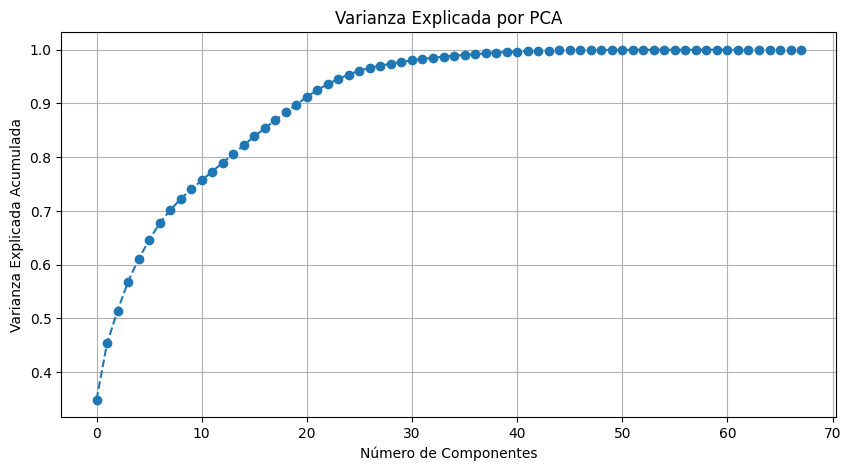

In [50]:


# Obtener la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance)

# Graficar la varianza acumulada
plt.figure(figsize=(10,5))
plt.plot(varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()



In [51]:
# Número mínimo de componentes que explican el 95% de la varianza
num_componentes_optimos = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Número óptimo de componentes: {num_componentes_optimos}")


Número óptimo de componentes: 25


In [53]:
# Obtener las cargas de los componentes
componentes = pca.components_

# Crear un DataFrame de las cargas, con las columnas siendo las variables originales
cargas_df = pd.DataFrame(componentes, columns=datos_df.columns)

# Mostrar las cargas de los primeros 2 componentes principales
print("Cargas de los primeros 2 componentes principales:")
print(cargas_df.iloc[:, :2])

# Encontrar las variables que más contribuyen a cada componente
for i in range(cargas_df.shape[1]):  # Para cada componente
    # Ordenar las variables por la magnitud de su carga
    contribuciones = cargas_df.iloc[:, i].abs().sort_values(ascending=False)
    print(f"\nVariables más importantes para el componente PC{i+1}:")
    print(contribuciones.head(10))  # Mostrar las 10 variables más influyentes

Cargas de los primeros 2 componentes principales:
    creditos  cte_creds_prom_3ant
0   0.106640             0.107262
1   0.460306             0.461316
2  -0.122151            -0.121427
3  -0.030792            -0.030642
4  -0.049358            -0.048003
..       ...                  ...
63  0.000544             0.000072
64  0.000042             0.000012
65  0.000764             0.000301
66  0.713002            -0.000450
67 -0.006775            -0.000043

[68 rows x 2 columns]

Variables más importantes para el componente PC1:
66    0.713002
1     0.460306
42    0.449192
49    0.195601
2     0.122151
0     0.106640
8     0.059746
4     0.049358
41    0.038755
16    0.037541
Name: creditos, dtype: float64

Variables más importantes para el componente PC2:
49    0.845120
1     0.461316
42    0.183299
2     0.121427
0     0.107262
8     0.055265
48    0.048749
4     0.048003
16    0.037047
3     0.030642
Name: cte_creds_prom_3ant, dtype: float64

Variables más importantes para el component